Notebook to Analyse train data

------------------------ SECTION 1: Indentifying Train Operator -------------------------

Import data

In [2]:
import pandas as pd
df = pd.read_csv('train_timings_data.csv')
map_df = pd.read_csv('STANOX_mappings.csv')

Drop NaNs from mapping table

In [3]:
map_df['STANOX'] = pd.to_numeric(map_df['STANOX'],errors='coerce')
map_df = map_df[map_df['STANOX'].notna()]
map_df = map_df[['STANOX','Location']]


Join Mapping table

In [4]:
df = pd.merge(df,map_df,left_on='planned_event_location',right_on='STANOX',how='left')

Check dataframe properties

In [5]:
df.nunique()

origin_date                   124
train_id                    36090
signal                        343
signal_passing_time       2160710
planned_event_type              3
planned_event_location         26
planned_event_time         279171
actual_event_time          843324
STANOX                         26
Location                       26
dtype: int64

Check first 5 rows

In [7]:
df.head()

,origin_date,train_id,signal,signal_passing_time,planned_event_type,planned_event_location,planned_event_time,actual_event_time,STANOX,Location
0,2022-07-31,521B141I31,Q50305,2022-07-31 10:49:13+00:00,DEPARTURE,51013.0,2022-07-31 10:49:00+00:00,2022-07-31 10:49:01+00:00,51013.0,Leigh-On-Sea
1,2022-07-31,521B141I31,Q50307,2022-07-31 10:49:43+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-31,521B141I31,Q50309,2022-07-31 10:50:17+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-31,521B141I31,Q50311,2022-07-31 10:50:41+00:00,ARRIVAL,51011.0,2022-07-31 10:51:00+00:00,2022-07-31 10:51:12+00:00,51011.0,Chalkwell
4,2022-07-31,521B141I31,Q50315,2022-07-31 10:52:39+00:00,DEPARTURE,51011.0,2022-07-31 10:51:30+00:00,2022-07-31 10:52:12+00:00,51011.0,Chalkwell


Get sample train_ids

In [9]:
df.drop_duplicates(subset='train_id').sample(5)

,origin_date,train_id,signal,signal_passing_time,planned_event_type,planned_event_location,planned_event_time,actual_event_time,STANOX,Location
1250292,2022-05-31,515J391031,Q50611,2022-05-30 23:21:53+00:00,DEPARTURE,51531.0,2022-05-30 23:22:00+00:00,2022-05-30 23:21:31+00:00,51531.0,Barking
795778,2022-05-10,512D07M610,Q5UGAP,2022-05-10 05:17:36+00:00,ARRIVAL,51313.0,2022-05-10 05:18:30+00:00,2022-05-10 05:19:10+00:00,51313.0,Chafford Hundred
2085523,2022-07-10,515S421710,Q5C354,2022-07-10 20:57:37+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1429156,2022-06-08,522B44M008,Q5C101,2022-06-07 23:02:07+00:00,NaN,NaN,NaN,NaN,NaN,NaN
160102,2022-04-08,511B05M608,Q50566,2022-04-08 05:34:12+00:00,DEPARTURE,51013.0,2022-04-08 05:34:00+00:00,2022-04-08 05:33:40+00:00,51013.0,Leigh-On-Sea


Check all events for single train_id

In [10]:
df.loc[df['train_id']=='512R27MX27'].sort_values(by = 'signal_passing_time')[['planned_event_time'
,'Location','planned_event_type','actual_event_time','signal']].dropna().head(10)

,planned_event_time,Location,planned_event_type,actual_event_time,signal
549577,2022-04-27 17:51:00+00:00,Barking,ARRIVAL,2022-04-27 17:49:45+00:00,Q50612
549578,2022-04-27 17:52:00+00:00,Barking,DEPARTURE,2022-04-27 17:51:32+00:00,Q50610
549586,2022-04-27 17:57:00+00:00,West Ham High Level,ARRIVAL,2022-04-27 17:56:28+00:00,Q50138
549587,2022-04-27 17:58:00+00:00,West Ham High Level,DEPARTURE,2022-04-27 17:57:30+00:00,Q50136
549590,2022-04-27 18:01:00+00:00,Gas Factory Junction,DEPARTURE,2022-04-27 17:59:51+00:00,Q50130
549593,2022-04-27 18:03:00+00:00,Limehouse,ARRIVAL,2022-04-27 18:01:37+00:00,Q50124
549594,2022-04-27 18:04:00+00:00,Limehouse,DEPARTURE,2022-04-27 18:03:36+00:00,Q50122
549598,2022-04-27 18:06:00+00:00,Christian Street Junction,DEPARTURE,2022-04-27 18:05:37+00:00,Q50112
549600,2022-04-27 18:09:00+00:00,Fenchurch Street,DESTINATION,2022-04-27 18:09:57+00:00,Q50510
1188416,2022-05-27 17:57:00+00:00,Barking,ARRIVAL,2022-05-27 17:55:43+00:00,Q50612


Check one signal

In [11]:
pd.set_option('display.max_rows', 5)
df.loc[df['signal']=='Q50348'].sort_values(by = 'signal_passing_time')

,origin_date,train_id,signal,signal_passing_time,planned_event_type,planned_event_location,planned_event_time,actual_event_time,STANOX,Location
9609,2022-04-01,515S57M101,Q50348,2022-04-01 00:25:29+00:00,NaN,NaN,NaN,NaN,NaN,NaN
9669,2022-04-01,515S61M101,Q50348,2022-04-01 01:02:11+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8591,2022-07-31,512B15M831,Q50348,2022-07-31 21:43:01+00:00,ARRIVAL,51004.0,2022-07-31 21:43:30+00:00,2022-07-31 21:43:43+00:00,51004.0,Thorpe Bay
8769,2022-07-31,512B171831,Q50348,2022-07-31 21:59:07+00:00,ARRIVAL,51004.0,2022-07-31 22:00:30+00:00,2022-07-31 21:59:49+00:00,51004.0,Thorpe Bay


Check one location

In [12]:
pd.set_option('display.max_rows', 5)
df.loc[df['planned_event_location']==51001.0].sort_values(by = 'signal_passing_time')


,origin_date,train_id,signal,signal_passing_time,planned_event_type,planned_event_location,planned_event_time,actual_event_time,STANOX,Location
9521,2022-04-01,512Z001101,Q50353,2022-04-01 00:17:34+00:00,DESTINATION,51001.0,2022-04-01 00:19:00+00:00,2022-04-01 00:19:10+00:00,51001.0,Shoeburyness
9606,2022-04-01,515S57M101,Q5A354,2022-04-01 00:23:38+00:00,DEPARTURE,51001.0,2022-04-01 00:24:00+00:00,2022-04-01 00:23:15+00:00,51001.0,Shoeburyness
...,...,...,...,...,...,...,...,...,...,...
9154,2022-07-31,522B16M931,Q50353,2022-07-31 23:43:42+00:00,DESTINATION,51001.0,2022-07-31 23:46:00+00:00,2022-07-31 23:45:18+00:00,51001.0,Shoeburyness
9481,2022-08-01,515S25M001,Q5A354,2022-07-31 23:52:08+00:00,DEPARTURE,51001.0,2022-07-31 23:54:00+00:00,2022-07-31 23:51:51+00:00,51001.0,Shoeburyness


------------------ Section 2: Investigate how number of trains varies over time. ------------------------

In [13]:
#convert timestamps to datetime in BST timezone
for time_stamp in ['signal_passing_time','planned_event_time','actual_event_time']:
    df[time_stamp] = pd.to_datetime(df[time_stamp]).dt.tz_convert('Europe/London')

Create Table with one row per train, with earliest signal passing time for each train:

In [82]:
#filter for planned stops
events_df = df[df['planned_event_type'].isin(['ARRIVAL','DESTINATION','DEPARTURE'])]
events_df.sample(3)

,origin_date,train_id,signal,signal_passing_time,planned_event_type,planned_event_location,planned_event_time,actual_event_time,STANOX,Location
94417,2022-04-05,522D22MG05,Q50167,2022-04-05 10:25:32+01:00,DEPARTURE,51531.0,2022-04-05 10:25:30+01:00,2022-04-05 10:25:19+01:00,51531.0,Barking
270584,2022-04-13,519Z531813,Q50334,2022-04-13 22:18:12+01:00,ARRIVAL,51007.0,2022-04-13 22:19:30+01:00,2022-04-13 22:18:50+01:00,51007.0,Southend Central
2160767,2022-07-14,511B01M514,Q50212,2022-07-14 06:14:39+01:00,DEPARTURE,51351.0,2022-07-14 06:15:00+01:00,2022-07-14 06:14:27+01:00,51351.0,Upminster


In [83]:
#group by individual trains 
trains_df_temp = events_df[['train_id','origin_date','signal_passing_time']].groupby(by=['train_id','origin_date']).agg(first_signal_passing_time=('signal_passing_time',min))
trains_df_temp.sample(3)

,,first_signal_passing_time
train_id,origin_date,
512D05MB15,2022-05-15,2022-05-15 08:43:51+01:00
512R89MH13,2022-07-13,2022-07-13 10:58:12+01:00
522D32ML15,2022-06-15,2022-06-15 12:41:27+01:00


Find first and last stops of each train

In [17]:
#row number by stop order
pd.options.mode.chained_assignment = None
stop_order_df = events_df[['train_id','origin_date','planned_event_time','planned_event_type','actual_event_time','Location','signal_passing_time']]
stop_order_df['stop_no_asc']=stop_order_df.sort_values(['actual_event_time'],ascending=True).groupby(['train_id','origin_date']).cumcount()+1
stop_order_df['stop_no_desc']=stop_order_df.sort_values(['actual_event_time'],ascending=False).groupby(['train_id','origin_date']).cumcount()+1

In [18]:
#filter columns
col_list = ['train_id','origin_date','Location','planned_event_time','actual_event_time']
first_stop_df = stop_order_df[col_list][(stop_order_df['stop_no_asc']==1)]
last_stop_df = stop_order_df[col_list][(stop_order_df['stop_no_desc']==1)]

In [19]:
#join first stops 
trains_df_temp2 = pd.merge(trains_df_temp,first_stop_df,how='left',on=['train_id','origin_date'])
trains_df_temp2.rename(columns={'Location':'Origin_Location','planned_event_time':'planned_origin_depart_time','actual_event_time':'actual_origin_depart_time'},inplace=True)

In [20]:
#join last stops
trains_df = pd.merge(trains_df_temp2,last_stop_df,how='left',on=['train_id','origin_date'])
trains_df.rename(columns={'Location':'Destination_Location','planned_event_time':'planned_dest_arrival_time','actual_event_time':'actual_dest_arrival_time'},inplace=True)
trains_df['route']=trains_df['Origin_Location']+'->'+trains_df['Destination_Location']
trains_df.sample(2)

,train_id,origin_date,first_signal_passing_time,Origin_Location,planned_origin_depart_time,actual_origin_depart_time,Destination_Location,planned_dest_arrival_time,actual_dest_arrival_time,route
18181,512J76MQ11,2022-05-11,2022-05-11 15:09:10+01:00,Barking,2022-05-11 15:09:00+01:00,2022-05-11 15:08:49+01:00,Barking Station Junction,2022-05-11 15:10:00+01:00,2022-05-11 15:10:24+01:00,Barking->Barking Station Junction
63567,722J97MW03,2022-04-03,2022-04-03 18:40:56+01:00,Barking Station Junction,2022-04-03 18:42:00+01:00,2022-04-03 18:41:23+01:00,Barking,2022-04-03 18:43:00+01:00,2022-04-03 18:43:15+01:00,Barking Station Junction->Barking


In [21]:
#extract hour, day, month, weekday from timestamp
trains_df['depart_hour'] = trains_df['planned_origin_depart_time'].dt.hour
trains_df['depart_week'] = trains_df['planned_origin_depart_time'].dt.isocalendar().week
trains_df['depart_iso_year'] = trains_df['planned_origin_depart_time'].dt.isocalendar().year
trains_df['depart_month'] = trains_df['planned_origin_depart_time'].dt.month
trains_df['depart_weekday'] = trains_df['planned_origin_depart_time'].dt.day_name()

In [22]:
#aggregate at hourly level
departures_agg = trains_df.groupby(by=['depart_month','origin_date','depart_weekday','depart_hour','depart_week']).size().to_frame('n_trains').reset_index()

In [23]:
#Add boolean column to distinguish weekdays from weekends
departures_agg['is_weekday']=departures_agg['depart_weekday'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])

In [84]:
#check rows
departures_agg.sample(3)

,depart_month,origin_date,depart_weekday,depart_hour,depart_week,n_trains,is_weekday
1145,5,2022-05-12,Thursday,13,19,26,Weekdays
264,4,2022-04-10,Sunday,8,14,12,Weekends
3263,7,2022-07-30,Saturday,1,30,6,Weekends


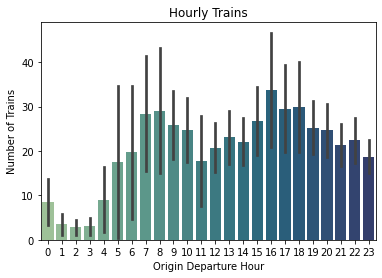

In [25]:
#visualise at hourly level
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=departures_agg,x='depart_hour',y='n_trains',palette='crest',ci='sd')
ax.set(xlabel='Origin Departure Hour', ylabel='Number of Trains',title ='Hourly Trains');

Check weekdays vs weekends

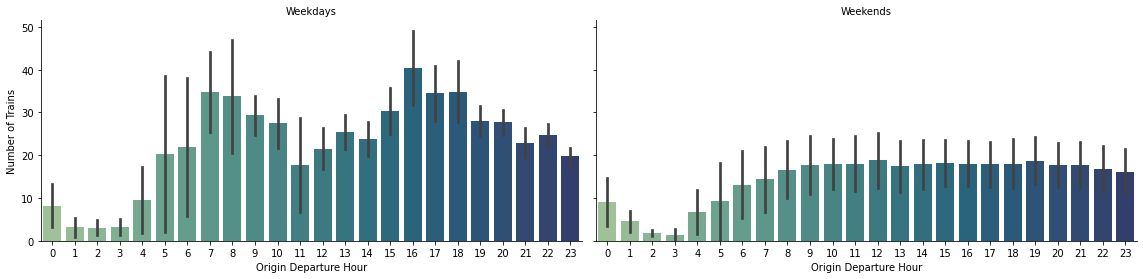

In [26]:
import numpy as np
#rename weekday column values
departures_agg['is_weekday'] =  departures_agg['is_weekday'].replace({True:'Weekdays',False:'Weekends'})

#plot visualisations
g = sns.FacetGrid(data=departures_agg, col="is_weekday", height=4,aspect=2)
g.map(sns.barplot, 'depart_hour','n_trains',palette='crest',order=np.arange(24),ci='sd');
g.set_axis_labels('Origin Departure Hour','Number of Trains');
g.set_titles(col_template='{col_name}');


Check weekly variation

In [85]:
#Aggregate train level dataframe on day level 
departures_day_agg = trains_df.groupby(by='origin_date').size().to_frame('n_trains').reset_index()
departures_day_agg['origin_date'] = pd.to_datetime(departures_day_agg['origin_date'])
departures_day_agg['depart_weekday']=departures_day_agg['origin_date'].dt.day_name()
departures_day_agg.sample(3)

,origin_date,n_trains,depart_weekday
56,2022-05-26,655,Thursday
76,2022-06-15,671,Wednesday
45,2022-05-15,300,Sunday


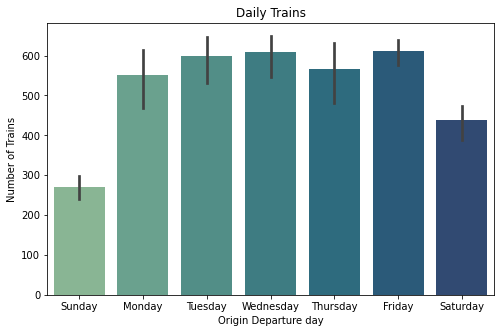

In [86]:
#visualise
fig = plt.figure(figsize=(8,5))
ax = sns.barplot(data=departures_day_agg,x='depart_weekday',y='n_trains',palette='crest',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']);
ax.set(xlabel='Origin Departure day', ylabel='Number of Trains',title ='Daily Trains');

------------------------------- Section 3: Check for Data Outages -----------------------------------------

In [29]:
#row number by signal passing time
sorted_df = df.sort_values(by='signal_passing_time').reset_index()[['signal_passing_time','train_id']]
sorted_df['row_no'] = sorted_df.index
sorted_df['row_no_plus_1'] = sorted_df['row_no']+1

In [30]:
# join with row below to get next signal time
gap_between_signals_df = pd.merge(sorted_df,sorted_df,left_on='row_no',right_on='row_no_plus_1',how='left')

In [31]:
# calculate gap between signals
gap_between_signals_df['gap']=gap_between_signals_df['signal_passing_time_x']-gap_between_signals_df['signal_passing_time_y']

In [32]:
#convert to minutes
longest_gaps['gap_hours']=longest_gaps['gap'].dt.seconds/3600

Text(0.5, 1.0, 'Largest Gaps between Recorded Signal Passes')

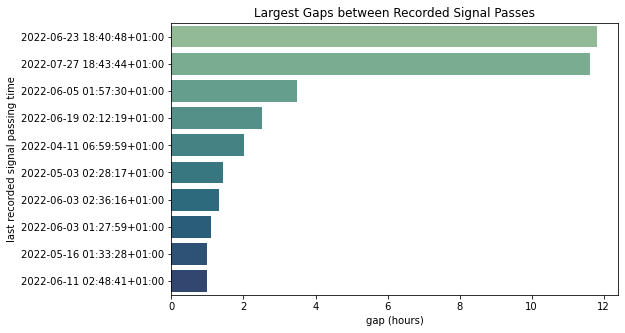

In [33]:
#visualise
plt.figure(figsize=(8,5))
ax = sns.barplot(data=longest_gaps,y='signal_passing_time_y',x='gap_hours',orient='h',palette='crest')
ax.set_ylabel('last recorded signal passing time')
ax.set_xlabel('gap (hours)')
ax.set_title('Largest Gaps between Recorded Signal Passes')

------------------ Section 4: Check impact of strikes on week of 20th of June ----------------------------------------

In [88]:
#filter to dates affected
strike_data = departures_day_agg[departures_day_agg['origin_date'].between(pd.to_datetime('2022-06-6'),pd.to_datetime('2022-07-11'))]


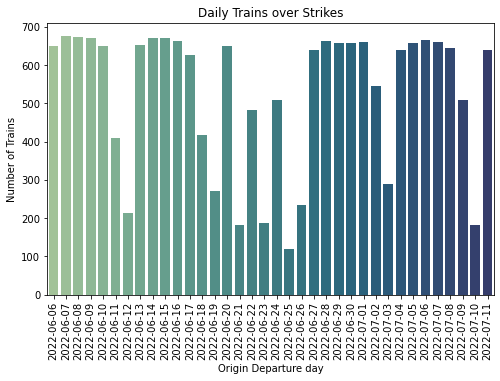

In [89]:
fig = plt.figure(figsize=(8,5))
g = sns.barplot(data=strike_data,x='origin_date',y='n_trains',palette='crest')
g.set(xlabel='Origin Departure day', ylabel='Number of Trains',title ='Daily Trains over Strikes')
g.set_xticklabels(strike_data['origin_date'].dt.date)
plt.xticks(rotation=90);

Plot weekly 

In [90]:
#aggregate by week
trains_week_agg = trains_df.groupby(by=['depart_week','depart_iso_year']).size().to_frame('n_trains').reset_index()


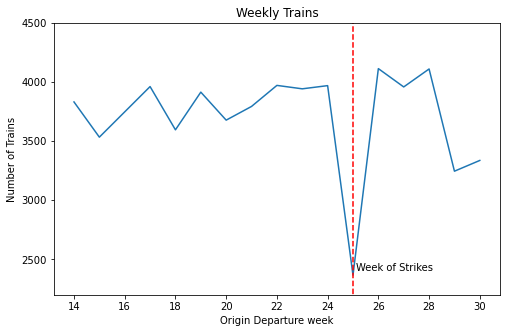

In [39]:
#remove first and last week due to data starting and ending mid week and visualise
fig = plt.figure(figsize=(8,5))
g = sns.lineplot(data=trains_week_agg[1:-1],x='depart_week',y='n_trains',palette='crest')
g.set(xlabel='Origin Departure week', ylabel='Number of Trains',title ='Weekly Trains')
plt.plot([25,25],[2000,5000],'--',color='red')
plt.ylim([2200,4500]);
plt.text(x=25.1,y=2400,s='Week of Strikes');

Get Punctuality metrics

Get planned arrival/destination for each train, and corresponding planned time for all stops

In [41]:
#filter for arrivals and destinations
arrivals_df = df[df['planned_event_type'].isin(['ARRIVAL','DESTINATION',])]
arrivals_df =  arrivals_df[['origin_date','train_id','signal','Location','planned_event_time','actual_event_time']]

In [42]:
#get punctuality metrics
import datetime
arrivals_df['On_time'] = arrivals_df['actual_event_time']-arrivals_df['planned_event_time'] < datetime.timedelta(minutes=1)
arrivals_df['On_time_15'] = arrivals_df['actual_event_time']-arrivals_df['planned_event_time'] < datetime.timedelta(minutes=15)

In [91]:
#extract datetime features
arrivals_df['origin_date'] = pd.to_datetime(arrivals_df['origin_date'])
arrivals_df['depart_week']= arrivals_df['origin_date'].dt.isocalendar().week
arrivals_df['depart_isoyear']= arrivals_df['origin_date'].dt.isocalendar().year
arrivals_df.sample(3)

,origin_date,train_id,signal,Location,planned_event_time,actual_event_time,On_time,On_time_15,depart_week,depart_isoyear
1749801,2022-06-24,522D381O24,Q50327,Southend Central,2022-06-24 15:24:00+01:00,2022-06-24 15:24:01+01:00,True,True,25,2022
1275235,2022-06-01,522B44M001,Q50327,Southend Central,2022-06-01 00:58:00+01:00,2022-06-01 01:02:29+01:00,False,True,22,2022
1511645,2022-06-11,529B20MN11,Q50285,Benfleet,2022-06-11 14:29:30+01:00,2022-06-11 14:29:29+01:00,True,True,23,2022


In [46]:
#aggregate by week
stops_weekly_agg = arrivals_df.groupby(['depart_week','depart_isoyear']).agg(On_time = ('On_time',sum),On_time_15 = ('On_time_15',sum),n_stops = ('train_id',len))

In [47]:
#calculate OTP metrics
stops_weekly_agg['OTP'] = 100*stops_weekly_agg['On_time']/stops_weekly_agg['n_stops']
stops_weekly_agg['OTP15'] = 100*stops_weekly_agg['On_time_15']/stops_weekly_agg['n_stops']
stops_weekly_agg = stops_weekly_agg[1:-1]
stops_weekly_agg.reset_index(inplace=True)

In [48]:
#convert to plot friendly format
OTP_plot_data = stops_weekly_agg[['depart_week','depart_isoyear','OTP','OTP15']].melt(['depart_week','depart_isoyear'])

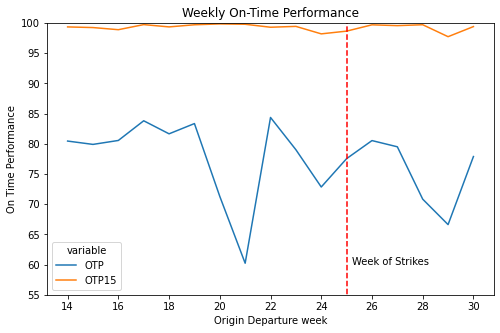

In [49]:
#visualise performance metrics
fig = plt.figure(figsize=(8,5))
g = sns.lineplot(data=OTP_plot_data,x='depart_week',y='value',hue='variable')
g.set(xlabel='Origin Departure week', ylabel='On Time Performance',title ='Weekly On-Time Performance')
plt.plot([25,25],[0,100],'--',color='r');
plt.ylim([55,100]);
plt.text(25.2,60,'Week of Strikes');


------------------Section 5: Get distribution of running times: Pitsea to Benfleet-------------------------------

In [50]:
#filter departures
departures_df = events_df[events_df['planned_event_type']=='DEPARTURE']
departures_df['origin_date'] = pd.to_datetime(departures_df['origin_date'])

In [51]:
#join with arrivals to get stops dataframe
stops_df = pd.merge(arrivals_df,departures_df,on=['train_id','origin_date','Location'],suffixes=('_arrvl','_dprt'))

In [52]:
#Row number by stop to get STOP A -> STOP B in each row
stops_df['stop_no_plus1']=stops_df.sort_values(by='signal_passing_time',ascending=True).groupby(by=['train_id','origin_date']).cumcount()+1
stops_df['stop_no']= stops_df['stop_no_plus1']-1

In [53]:
#filter columns and join
col_list = ['origin_date','train_id','Location','planned_event_time_arrvl','actual_event_time_arrvl'
    ,'planned_event_time_dprt','actual_event_time_dprt','On_time','On_time_15','stop_no_plus1','stop_no']
transit_times_df = pd.merge(stops_df[col_list],stops_df[col_list]
    ,left_on=['train_id','origin_date','stop_no_plus1']
    ,right_on=['train_id','origin_date','stop_no']
    ,how='inner'
    ,suffixes=('_orig','_dest'))

In [54]:
#calculate running times
transit_times_df['transit_time'] = transit_times_df['actual_event_time_arrvl_dest'] - transit_times_df['actual_event_time_dprt_orig']
transit_times_df['planned_transit_time'] = transit_times_df['planned_event_time_arrvl_dest'] - transit_times_df['planned_event_time_dprt_orig']
transit_times_df['within_running_time'] = transit_times_df['transit_time']<transit_times_df['planned_transit_time']

In [55]:
#filter to Pitsea and Benfleet
pitsea_to_bnflt = transit_times_df[(transit_times_df['Location_orig']=='Pitsea')&(transit_times_df['Location_dest']=='Benfleet')]

for col in ['transit_time','planned_transit_time']:
    pitsea_to_bnflt[col]=pitsea_to_bnflt[col].dt.seconds/60

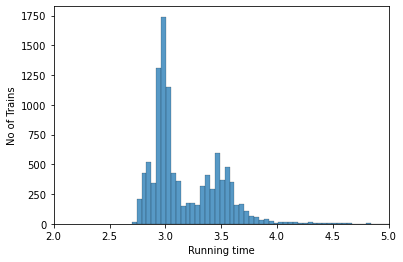

In [92]:
#visualise distribution
sns.histplot(pitsea_to_bnflt,x = 'transit_time')
plt.xlim(2,5);
plt.xlabel('Running time');
plt.ylabel('No of Trains');

In [57]:
#extract datetime features from origin depart time
pitsea_to_bnflt['planned_orig_depart_hour'] = pitsea_to_bnflt['planned_event_time_dprt_orig'].dt.hour
pitsea_to_bnflt['planned_orig_depart_day'] = pitsea_to_bnflt['planned_event_time_dprt_orig'].dt.day_name()
pitsea_to_bnflt['planned_orig_depart_day_no'] = pitsea_to_bnflt['planned_event_time_dprt_orig'].dt.weekday
pitsea_to_bnflt['is_rush_hour'] = pitsea_to_bnflt['planned_orig_depart_day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])&(pitsea_to_bnflt['planned_orig_depart_hour'].isin([7,8,17,18,19]))

In [58]:
#get hourly train frequency 
train_freq_hourly = pitsea_to_bnflt.groupby(by=['origin_date','planned_orig_depart_hour']).size().to_frame('hourly_trains')
#join hourly train frequency
pitsea_to_bnflt = pd.merge(pitsea_to_bnflt,train_freq_hourly,how='left',on=['origin_date','planned_orig_depart_hour'])

In [59]:
#row number by arrival time at destination station 
pitsea_to_bnflt_temp = pitsea_to_bnflt[['actual_event_time_arrvl_dest','Location_dest']]
pitsea_to_bnflt_temp['row_no_plus_1'] = pitsea_to_bnflt_temp.sort_values(by='actual_event_time_arrvl_dest',ascending=True).groupby(by='Location_dest').cumcount()+1
#row number plus 1
pitsea_to_bnflt['row_no'] = pitsea_to_bnflt.sort_values(by='actual_event_time_arrvl_dest',ascending=True).groupby(by='Location_dest').cumcount()
#join to get time of previous train
pitsea_to_bnflt = pd.merge(pitsea_to_bnflt,pitsea_to_bnflt_temp,how='inner',left_on=['row_no'],right_on=['row_no_plus_1'],suffixes=['','_prev_train'])
#calculate gap to previous train
pitsea_to_bnflt['gap_from_prev_train'] = pitsea_to_bnflt['actual_event_time_arrvl_dest']-pitsea_to_bnflt['actual_event_time_arrvl_dest_prev_train']
#convert to minnutes
pitsea_to_bnflt['gap_from_prev_train'] = pitsea_to_bnflt['gap_from_prev_train'].dt.seconds/60

In [93]:
#check output
pitsea_to_bnflt[['actual_event_time_arrvl_dest','actual_event_time_arrvl_dest_prev_train','gap_from_prev_train']].sample(3)

,actual_event_time_arrvl_dest,actual_event_time_arrvl_dest_prev_train,gap_from_prev_train
9437,2022-07-16 21:54:58+01:00,2022-07-16 21:42:50+01:00,12.133333
10466,2022-07-28 16:38:42+01:00,2022-07-28 16:28:42+01:00,10.000000
1006,2022-04-11 19:15:17+01:00,2022-04-11 19:08:37+01:00,6.666667


In [61]:
#join previous dataframe to get lane
pitsea_to_bnflt['origin_date'] = pd.to_datetime(pitsea_to_bnflt['origin_date'] )
trains_df['origin_date'] = pd.to_datetime(trains_df['origin_date'] )
pitsea_to_bnflt = pd.merge(pitsea_to_bnflt,trains_df[['train_id','origin_date','route']],how='left',on=['train_id','origin_date'])
#show list of columns
pitsea_to_bnflt.columns

Index(['origin_date', 'train_id', 'Location_orig',
       'planned_event_time_arrvl_orig', 'actual_event_time_arrvl_orig',
       'planned_event_time_dprt_orig', 'actual_event_time_dprt_orig',
       'On_time_orig', 'On_time_15_orig', 'stop_no_plus1_orig', 'stop_no_orig',
       'Location_dest', 'planned_event_time_arrvl_dest',
       'actual_event_time_arrvl_dest', 'planned_event_time_dprt_dest',
       'actual_event_time_dprt_dest', 'On_time_dest', 'On_time_15_dest',
       'stop_no_plus1_dest', 'stop_no_dest', 'transit_time',
       'planned_transit_time', 'within_running_time',
       'planned_orig_depart_hour', 'planned_orig_depart_day',
       'planned_orig_depart_day_no', 'is_rush_hour', 'hourly_trains', 'row_no',
       'actual_event_time_arrvl_dest_prev_train', 'Location_dest_prev_train',
       'row_no_plus_1', 'gap_from_prev_train', 'route'],
      dtype='object')

Test feature importance, using Random Forest regressor

In [62]:
#define list of features
feature_list = ['planned_orig_depart_hour','On_time_orig', 'On_time_15_orig',
         'is_rush_hour', 'hourly_trains', 'gap_from_prev_train','planned_orig_depart_hour','planned_orig_depart_day_no']

In [63]:
#split data into train and test set
from sklearn.model_selection import train_test_split

y = pitsea_to_bnflt['transit_time']
X_train, X_test, y_train, y_test = train_test_split(pitsea_to_bnflt[feature_list], pitsea_to_bnflt['transit_time'], random_state=42)

In [94]:
#fit random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train);


In [67]:
#get feature importances
from sklearn.inspection import permutation_importance
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_list)

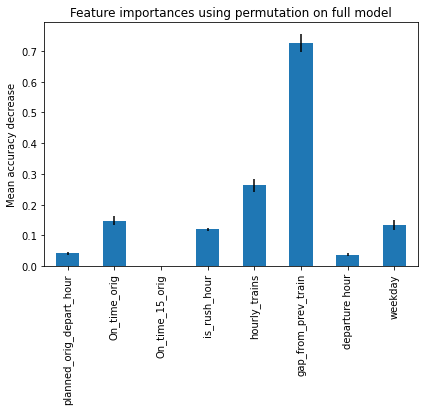

In [68]:
#plot feature importances
fig, ax = plt.subplots(figsize=(6,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[6] = 'departure hour'
labels[7] = 'weekday'

ax.set_xticklabels(labels)
plt.show()

Plot gap from prev train

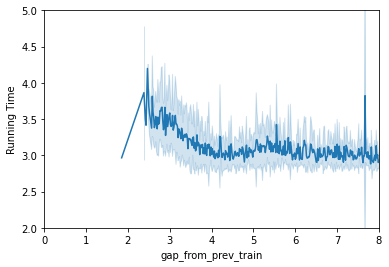

In [95]:
#plot gap vs running time
g = sns.lineplot(x=pitsea_to_bnflt['gap_from_prev_train'],y=pitsea_to_bnflt['transit_time'],ci='sd')
plt.xlim(0,8)
plt.ylim(2,5)
plt.ylabel('Running Time');

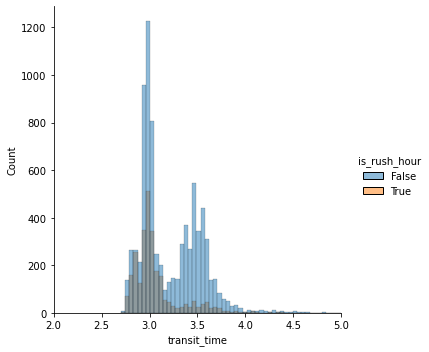

In [96]:
#plot distributino with rush hour
sns.displot(pitsea_to_bnflt,x = 'transit_time', hue='is_rush_hour')
plt.xlim(2,5);

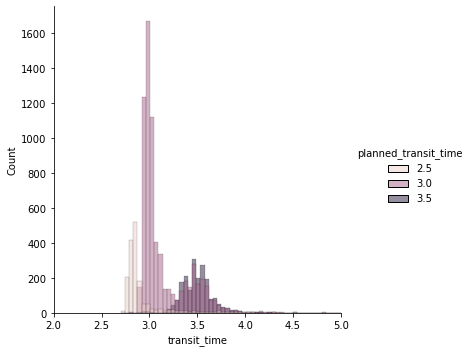

In [97]:
#plot distribution with planned transit time
sns.displot(pitsea_to_bnflt[pitsea_to_bnflt['planned_transit_time'].isin([2.5,3,3.5])],x = 'transit_time', hue='planned_transit_time')
plt.xlim(2,5);

In [72]:
#Calculate percentage within running time
percent_under_planned_running_time = 100*pitsea_to_bnflt['within_running_time'].sum()/len(pitsea_to_bnflt)
print(f'percent of trains within running time is {percent_under_planned_running_time:.2f}%')

percent of trains within running time is 33.80%


------------------------- Section 6: Further Opportunities --------------------------------------------------------

Calculate top offending stops over running time

In [73]:
#aggregate by origin and destination stop
transit_times_stops_agg = transit_times_df.groupby(by=['Location_orig','Location_dest']).agg(within_running_time=('within_running_time',sum),n_stops = ('train_id',len))

In [98]:
#rest index
transit_times_stops_agg.reset_index(inplace=True)

In [75]:
#calculate perecent of stops on time, and number of misses
transit_times_stops_agg['percent_with_running_time'] = 100*transit_times_stops_agg['within_running_time']/transit_times_stops_agg['n_stops']
transit_times_stops_agg['run_time_misses']= transit_times_stops_agg['n_stops'] - transit_times_stops_agg['within_running_time']

In [76]:
#show stops with highest number of misses
transit_times_stops_agg.sort_values(by='run_time_misses',ascending=False).head(10)

,Location_orig,Location_dest,within_running_time,n_stops,percent_with_running_time,run_time_misses
93,West Ham High Level,Barking,1636,15505,10.551435,13869
8,Barking,West Ham High Level,2728,15335,17.789371,12607
27,Chalkwell,Westcliff,58,10803,0.536888,10745
41,Leigh-On-Sea,Chalkwell,118,10791,1.093504,10673
23,Chalkwell,Leigh-On-Sea,6,10299,0.058258,10293
17,Benfleet,Pitsea,904,10485,8.621841,9581
75,Southend Central,Southend East,32,8746,0.365882,8714
77,Southend Central,Westcliff,169,8215,2.057212,8046
83,Thorpe Bay,Southend East,308,7855,3.921069,7547
59,Pitsea,Benfleet,3636,10758,33.798104,7122


Get punctuality metrics

In [77]:
#join train data frame to get route
stops_df = pd.merge(stops_df,trains_df[['train_id','origin_date','route']],on=['train_id','origin_date'],how='left')

In [78]:
#aggregate by route
OTP_lane_agg = stops_df.groupby(by='route').agg(on_time=('On_time',sum),n_stops=('train_id',len))

In [79]:
#calculate performance metrics and show greatest number of misses
OTP_lane_agg['OTP'] = 100*OTP_lane_agg['on_time']/OTP_lane_agg['n_stops']
OTP_lane_agg['OTP_misses'] = OTP_lane_agg['n_stops']-OTP_lane_agg['on_time']
OTP_lane_agg.sort_values(by='OTP_misses',ascending=False).head(10)

,on_time,n_stops,OTP,OTP_misses
route,,,,
Fenchurch Street->Shoeburyness,81432,107929,75.449601,26497
Shoeburyness->Fenchurch Street,83028,97111,85.498038,14083
Fenchurch Street->Southend Central,14980,21651,69.188490,6671
Southend Central->Fenchurch Street,15576,21589,72.147853,6013
Barking Station Junction->Shoeburyness,8085,10774,75.041767,2689
Fenchurch Street->Barking,8190,10028,81.671320,1838
Barking->Fenchurch Street,6872,8532,80.543835,1660
Chafford Hundred->Fenchurch Street,7364,9019,81.649850,1655
Fenchurch Street->Chafford Hundred,4575,5924,77.228224,1349
